# Wine Quality Dataset


By:**Buhle Mpala**    
Github url: https://github.com/Buhle123/219022649-Descriptive-Analytics-Assignment-3/blob/main/219022649%20Descriptive%20Analysis.ipynb

# Importing modules

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import gmean
from scipy.stats import kurtosis

In [2]:
wineQuality = pd.read_csv('winequalityN.csv')
wineQuality.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
wineQuality.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
#Cleaning the Data
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']:
    wineQuality[col].fillna(wineQuality[col].mean(), inplace=True)

In [5]:
wineQuality.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wineQuality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Dropping A Column

In [7]:
wineQualityCleaned = wineQuality.drop(columns=['type'])

### Descriptive Statistics Calculations

In [8]:
n = wineQualityCleaned.count()
mean = wineQualityCleaned.mean()
median = wineQualityCleaned.median()
gmean = wineQualityCleaned.apply(gmean)
mode = wineQualityCleaned.apply(lambda x: x.value_counts().idxmax())
stv_dev = np.std(wineQualityCleaned)
var = np.var(wineQualityCleaned)
kurtosis = kurtosis(wineQualityCleaned, fisher =True)
skewness = wineQualityCleaned.apply(lambda x: np.sum(((x - x.mean()) /
x.std())**3)) / n
range_e = wineQualityCleaned.max() - wineQualityCleaned.min()
minimum = wineQualityCleaned.min()
summ = wineQualityCleaned.sum()
maximum = wineQualityCleaned.max()
countt = wineQualityCleaned.count()
large = wineQualityCleaned.apply(lambda x: x.nlargest(1).iloc[0])
small = wineQualityCleaned.apply(lambda x: x.nsmallest(1).iloc[0])
covariance = stv_dev / gmean
q1 = wineQualityCleaned.apply(lambda x: np.percentile(x, 25))
q2 = wineQualityCleaned.apply(lambda x: np.percentile(x, 50))
q3 = wineQualityCleaned.apply(lambda x: np.percentile(x, 75))
Interquartile_Range = q3 - q1
mean_Absolute_Dev = wineQualityCleaned.apply(lambda x: np.mean(np.abs(x - x.mean())))
median_Absolute_Dev = wineQualityCleaned.apply(lambda x: np.median(np.abs(x - x.median())))
quartile_Coefficient_Dispersion = (q3 - q1) / (q3 + q1)
Percentile_10 = wineQualityCleaned.apply(lambda x: np.percentile(x, 10))
Percentile_90 = wineQualityCleaned.apply(lambda x: np.percentile(x, 90))


# Create the DataFrame
dataframe = pd.DataFrame({'Mean': mean, 'Median': median, 'Geometric Mean': gmean, 'Mode': mode, 'Standard Deviation': stv_dev,
                          'Variance': var, 'Kurtosis': kurtosis, 'Skewness': skewness, 'Range': range_e, 'Min': minimum,
                          'Sum': summ, 'Max': summ, 'Count': countt, 'Largest': large, 'Smallest': small,
                          'Covariance': covariance, 'First Quartile': q1, 'Second Quartile': q2, 'Third Quartile': q3,
                          'Interquartile Range': Interquartile_Range, 'Mean Absolute Deviation': mean_Absolute_Dev,
                          'Median Absolute Deviation': median_Absolute_Dev, 'Quartile Coefficient Of Dispersion': quartile_Coefficient_Dispersion,
                          'Percentile 10': Percentile_10, 'Percentage 90': Percentile_90})

# Define a function to highlight max value in each column
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Add some styling
styled_dataframe = dataframe.style.set_properties(**{'text-align': 'center', 'font-size': '12pt'}) \
                     .background_gradient(cmap='Blues', low=0.4, high=0.8) \
                     .highlight_max(axis=0, subset=pd.IndexSlice[:, ['Mean', 'Median', 'Geometric Mean']]) \
                     .set_caption('Descriptive Statistics') \
                     .set_table_styles([{'selector': 'caption',
                                         'props': [('font-size', '18pt'), ('font-weight', 'bold'), ('color', 'darkblue')]},
                                        {'selector': 'th',
                                         'props': [('border', '1px solid black'), ('background-color', 'lightgray'), ('color', 'black')]},
                                        {'selector': 'tbody tr:nth-child(even)',
                                         'props': [('background-color', 'whitesmoke')]}])

# Display the styled DataFrame
styled_dataframe



,Mean,Median,Geometric Mean,Mode,Standard Deviation,Variance,Kurtosis,Skewness,Range,Min,Sum,Max,Count,Largest,Smallest,Covariance,First Quartile,Second Quartile,Third Quartile,Interquartile Range,Mean Absolute Deviation,Median Absolute Deviation,Quartile Coefficient Of Dispersion,Percentile 10,Percentage 90
fixed acidity,7.216579,7.000000,7.114941,6.800000,1.295652,1.678713,5.065319,1.723335,12.100000,3.800000,46886.115793,46886.115793,6497,15.900000,3.800000,0.182103,6.400000,7.000000,7.700000,1.300000,0.913212,0.600000,0.092199,6.000000,8.800000
volatile acidity,0.339691,0.290000,0.307253,0.280000,0.164535,0.027072,2.831159,1.495742,1.500000,0.080000,2206.972528,2206.972528,6497,1.580000,0.080000,0.535503,0.230000,0.290000,0.400000,0.170000,0.124252,0.080000,0.269841,0.180000,0.590000
citric acid,0.318722,0.310000,0.000000,0.300000,0.145220,0.021089,2.401304,0.472923,1.660000,0.000000,2070.736166,2070.736166,6497,1.660000,0.000000,inf,0.250000,0.310000,0.390000,0.140000,0.105748,0.070000,0.218750,0.140000,0.490000
residual sugar,5.444326,3.000000,3.766084,2.000000,4.757026,22.629297,4.356121,1.434558,65.200000,0.600000,35371.788653,35371.788653,6497,65.800000,0.600000,1.263123,1.800000,3.000000,8.100000,6.300000,3.901505,1.700000,0.636364,1.300000,13.000000
chlorides,0.056042,0.047000,0.050266,0.044000,0.035028,0.001227,50.871362,5.398186,0.602000,0.009000,364.102083,364.102083,6497,0.611000,0.009000,0.696857,0.038000,0.047000,0.065000,0.027000,0.020642,0.011000,0.262136,0.031000,0.086000
free sulfur dioxide,30.525319,29.000000,24.931348,29.000000,17.748034,314.992702,7.899231,1.219503,288.000000,1.000000,198323.000000,198323.000000,6497,289.000000,1.000000,0.711876,17.000000,29.000000,41.000000,24.000000,14.019184,12.000000,0.413793,9.000000,54.000000
total sulfur dioxide,115.744574,118.000000,95.950523,111.000000,56.517505,3194.228316,-0.372301,-0.001177,434.000000,6.000000,751992.500000,751992.500000,6497,440.000000,6.000000,0.589028,77.000000,118.000000,156.000000,79.000000,45.679511,39.000000,0.339056,30.000000,188.000000
density,0.994697,0.994890,0.994692,0.997200,0.002998,0.000009,6.600061,0.503369,0.051870,0.987110,6462.544030,6462.544030,6497,1.038980,0.987110,0.003014,0.992340,0.994890,0.996990,0.004650,0.002483,0.002310,0.002337,0.990670,0.998400
pH,3.218395,3.210000,3.214425,3.160000,0.160625,0.025800,0.373532,0.387055,1.290000,2.720000,20909.915559,20909.915559,6497,4.010000,2.720000,0.049970,3.110000,3.210000,3.320000,0.210000,0.127216,0.110000,0.032659,3.020000,3.420000
sulphates,0.531215,0.510000,0.513296,0.500000,0.148757,0.022129,8.659479,1.798190,1.780000,0.220000,3451.304861,3451.304861,6497,2.000000,0.220000,0.289807,0.430000,0.510000,0.600000,0.170000,0.109458,0.080000,0.165049,0.370000,0.720000


### Scatter Plot Diagrams to visualize the relationship between two variables

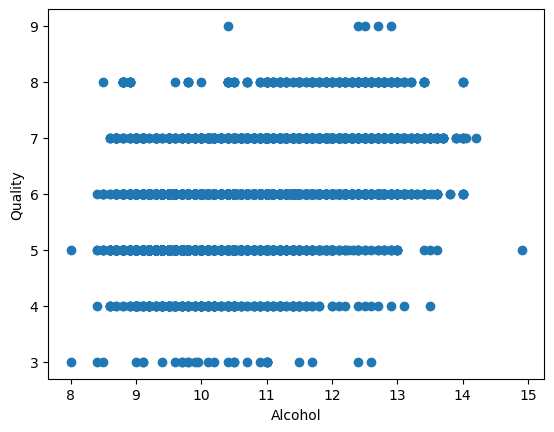

In [9]:
plt.scatter(wineQuality['alcohol'], wineQuality['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

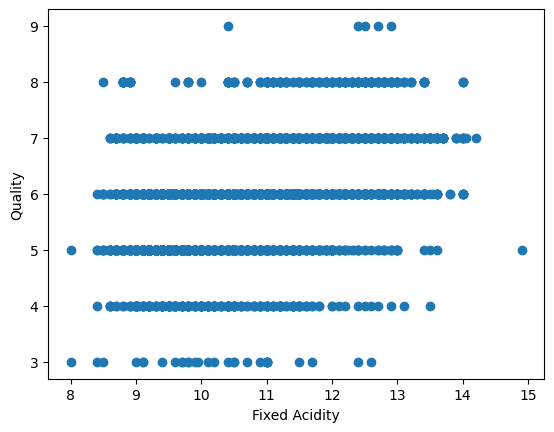

In [10]:
plt.scatter(wineQuality['alcohol'], wineQuality['quality'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Quality')
plt.show()

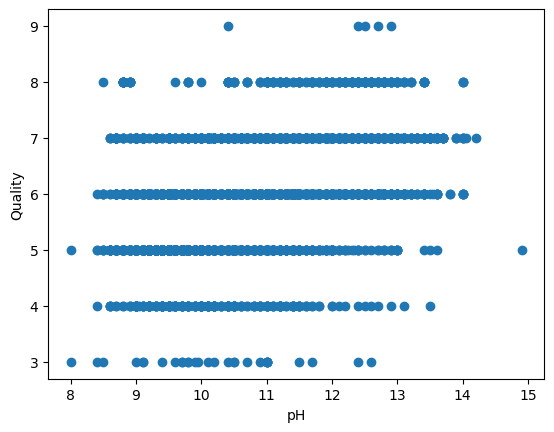

In [11]:
plt.scatter(wineQuality['alcohol'], wineQuality['quality'])
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

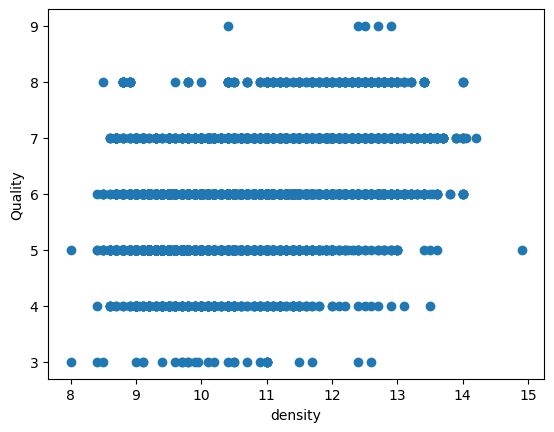

In [12]:
plt.scatter(wineQuality['alcohol'], wineQuality['quality'])
plt.xlabel('density')
plt.ylabel('Quality')
plt.show()

### Histogram Diagrams to visualize the distribution of a variable

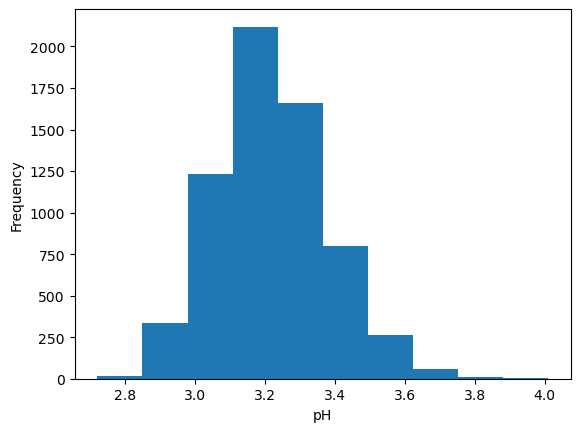

In [13]:
plt.hist((wineQuality['pH']))
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

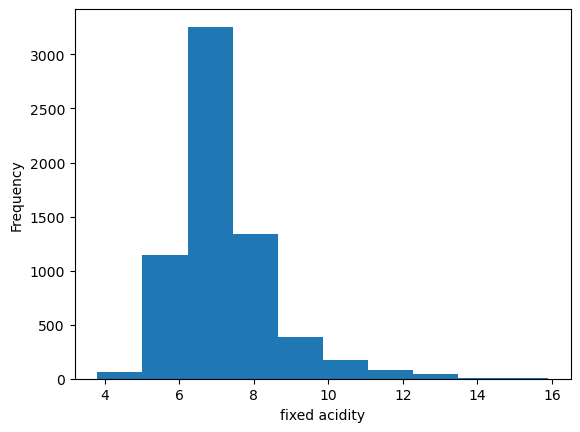

In [14]:
plt.hist((wineQuality['fixed acidity']))
plt.xlabel('fixed acidity')
plt.ylabel('Frequency')
plt.show()

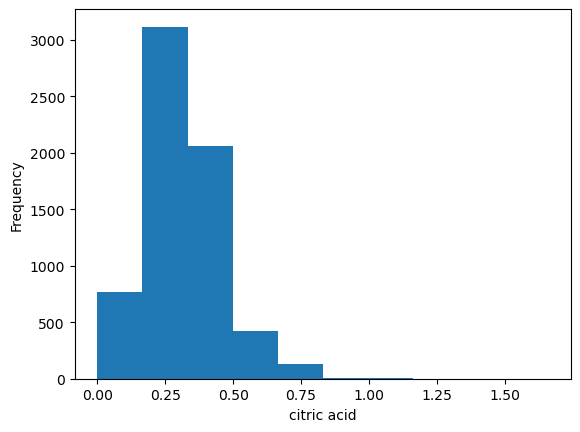

In [15]:
plt.hist((wineQuality['citric acid']))
plt.xlabel('citric acid')
plt.ylabel('Frequency')
plt.show()

### Box plot  Diagrams to visualize the distribution of a variable by groups

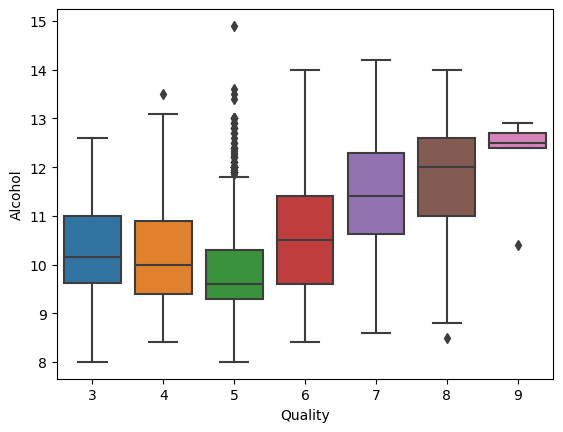

In [16]:
sns.boxplot(x='quality', y='alcohol', data=wineQuality)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

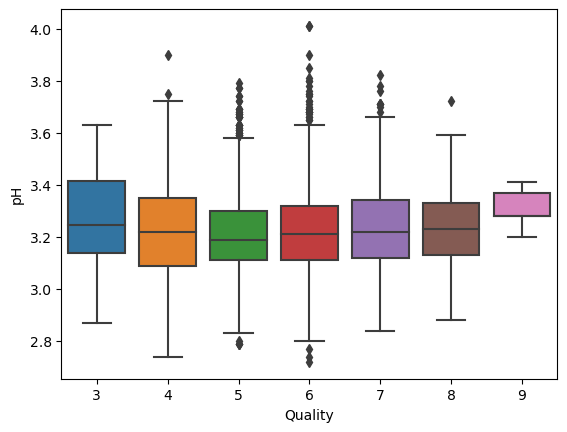

In [17]:
sns.boxplot(x='quality', y='pH', data=wineQuality)
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

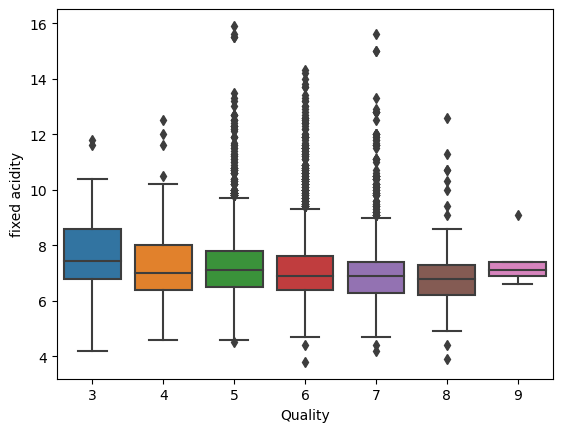

In [18]:
sns.boxplot(x='quality', y='fixed acidity', data=wineQuality)
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

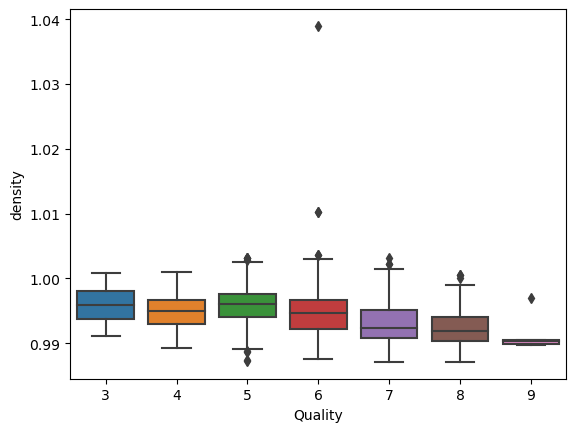

In [19]:
sns.boxplot(x='quality', y='density', data=wineQuality)
plt.xlabel('Quality')
plt.ylabel('density')
plt.show()

### Bar plot to compare the values of a categorical variable

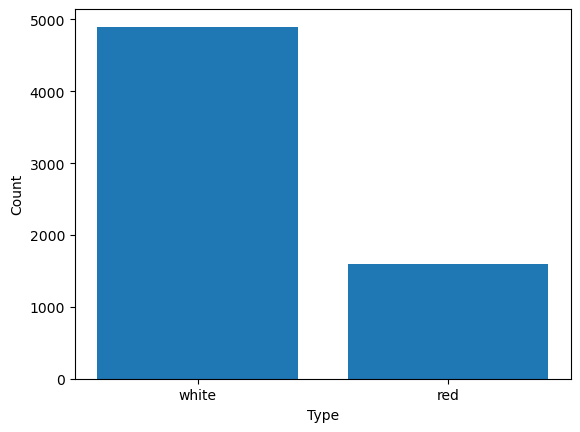

In [20]:
counts = wineQuality['type'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Scatterplot Matrix of Key Variables :A scatterplot matrix is used to visualize the relationships between key variables in the dataset.

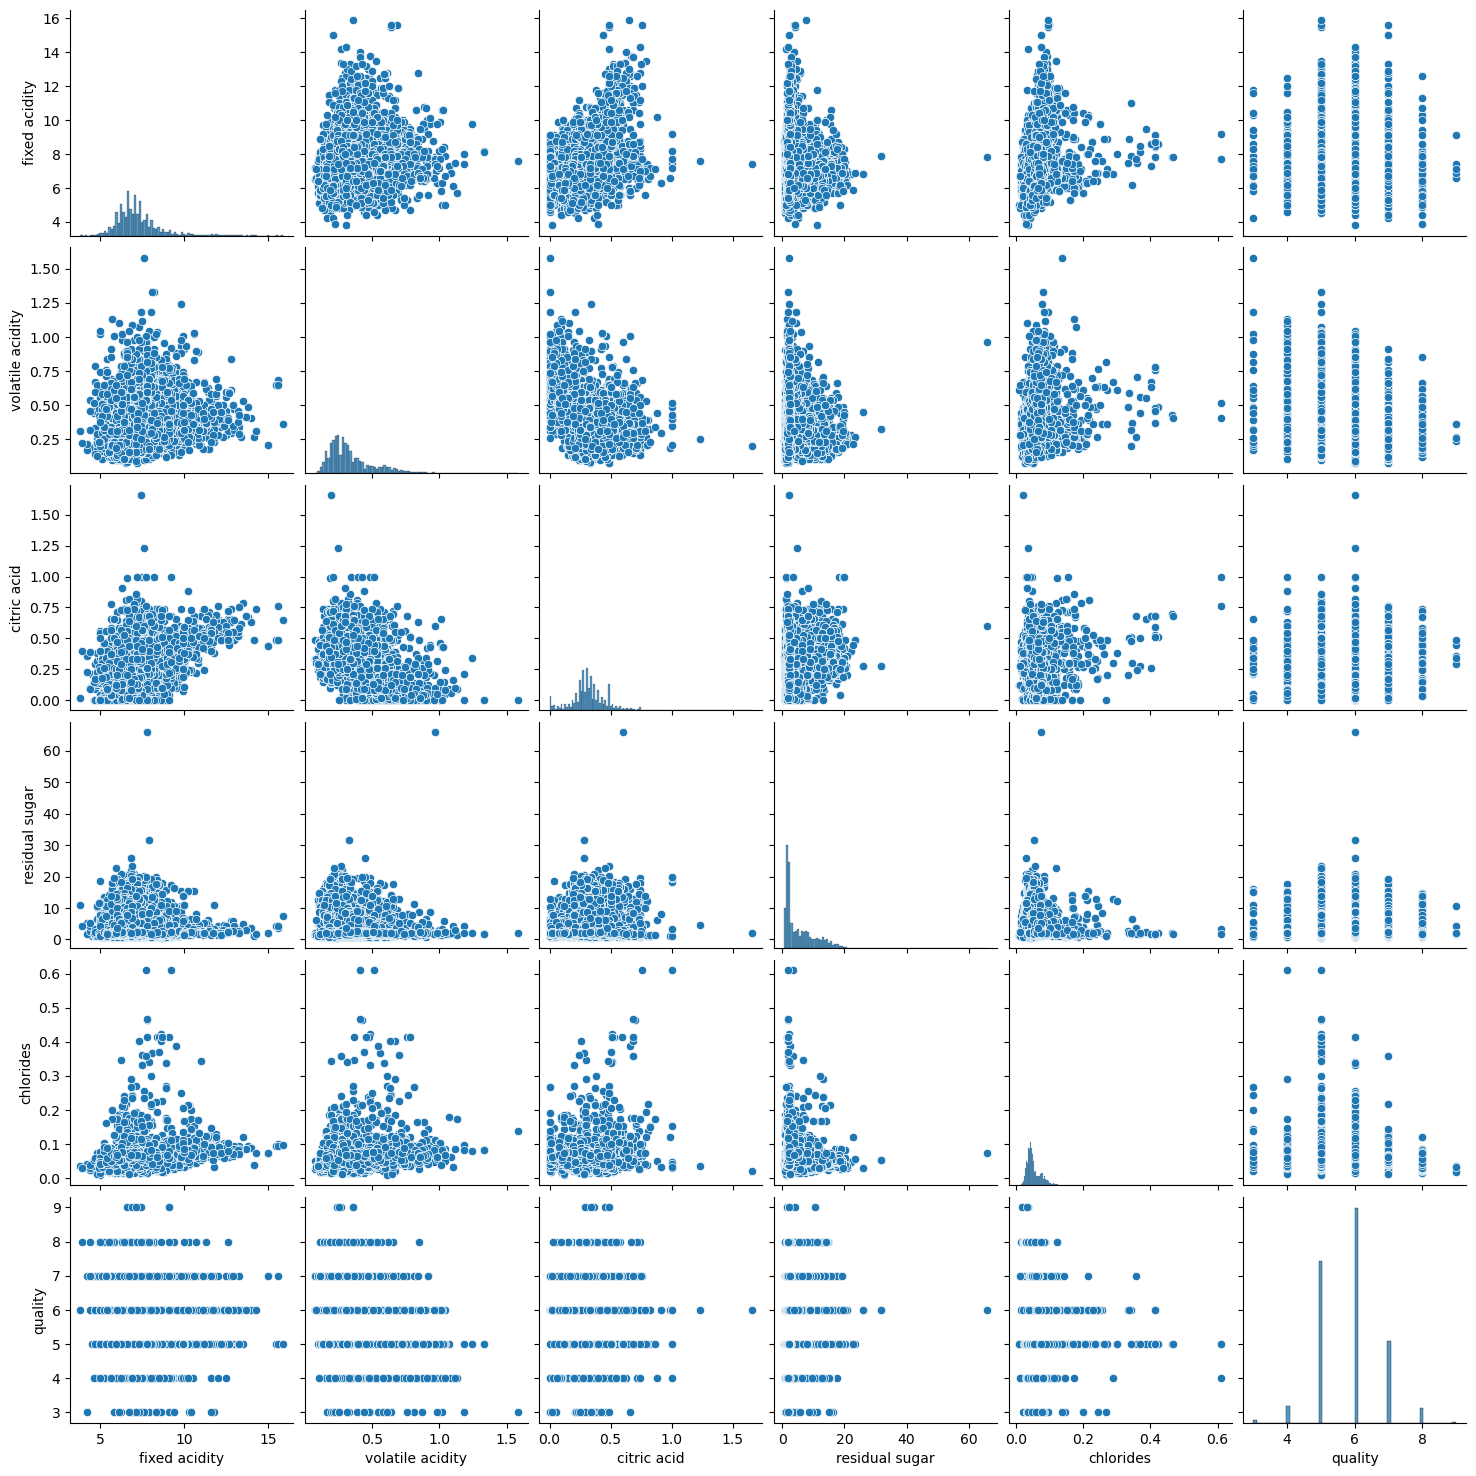

In [21]:
sns.pairplot(wineQuality[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'quality']])
plt.show()

### Correlation Matrix Heatmap : A heatmap of the correlation matrix is used to visualize the strength and direction of the correlations between variables.

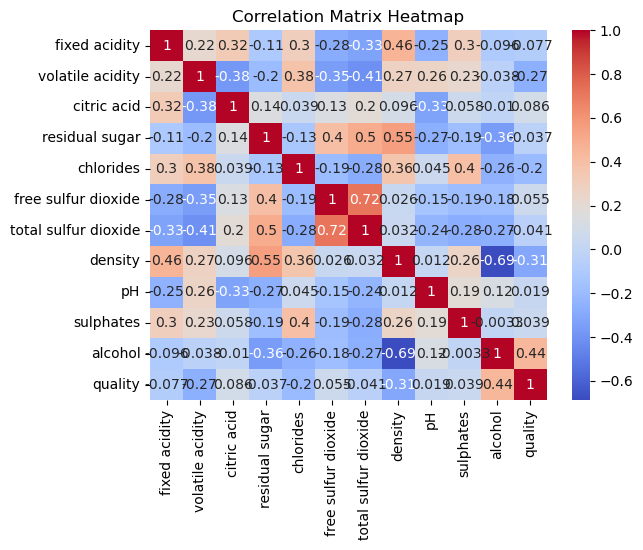

In [22]:
corr = wineQualityCleaned.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Barplot of Contents by Wine Type

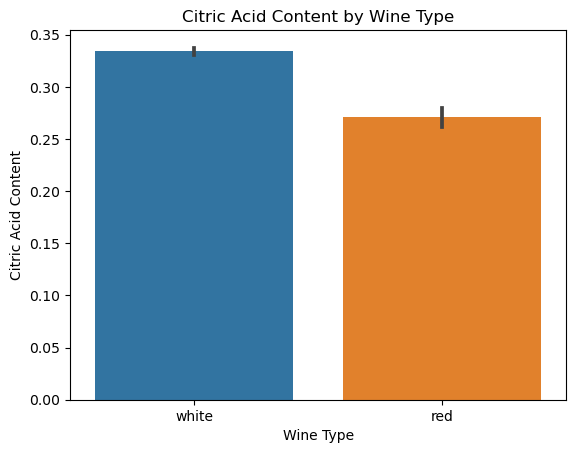

In [23]:
sns.barplot(x='type', y='citric acid', data=wineQuality)
plt.xlabel('Wine Type')
plt.ylabel('Citric Acid Content')
plt.title('Citric Acid Content by Wine Type')
plt.show()

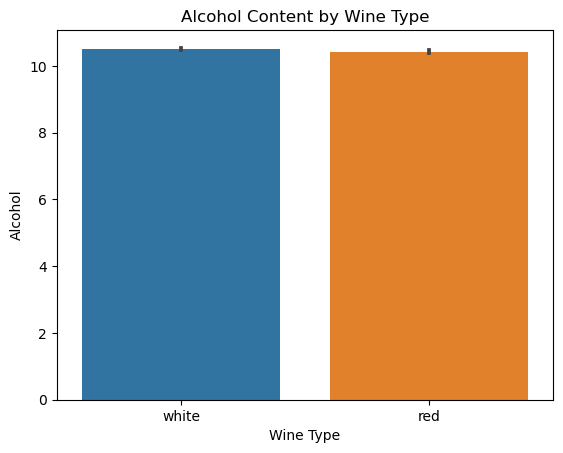

In [24]:
sns.barplot(x='type', y='alcohol', data=wineQuality)
plt.xlabel('Wine Type')
plt.ylabel('Alcohol')
plt.title('Alcohol Content by Wine Type')
plt.show()

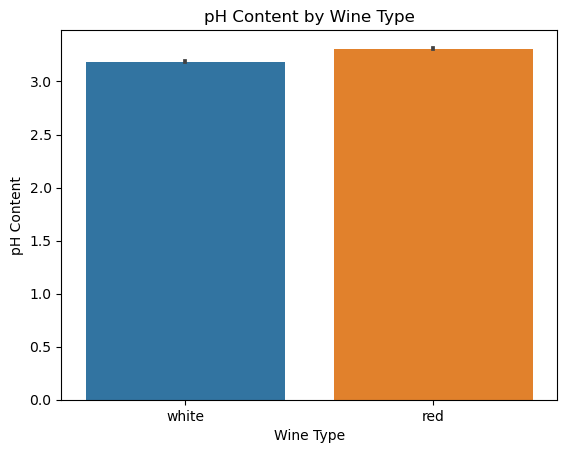

In [25]:
sns.barplot(x='type', y='pH', data=wineQuality)
plt.xlabel('Wine Type')
plt.ylabel('pH Content')
plt.title('pH Content by Wine Type')
plt.show()

### Scatterplot of Free Sulfur Dioxide vs. Total Sulfur Dioxide

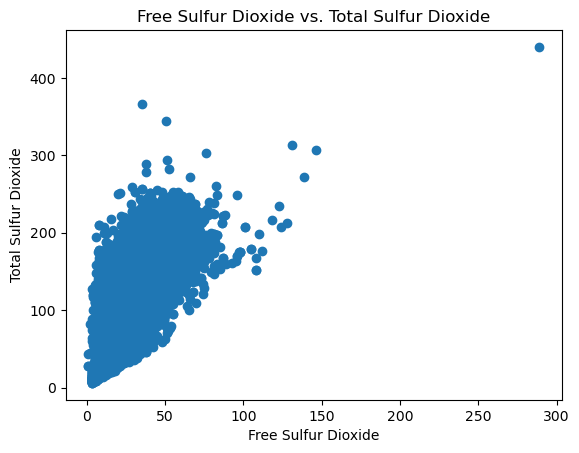

In [26]:
plt.scatter(wineQuality['free sulfur dioxide'], wineQuality['total sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Free Sulfur Dioxide vs. Total Sulfur Dioxide')
plt.show()

### Violinplot of pH by Quality Score

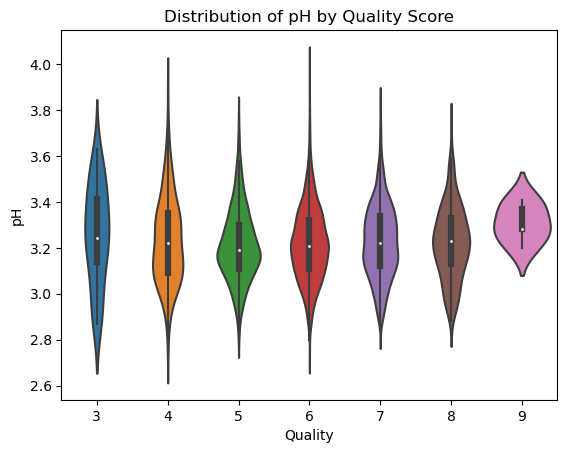

In [27]:
sns.violinplot(x='quality', y='pH', data=wineQuality)
plt.xlabel('Quality')
plt.ylabel('pH')
plt.title('Distribution of pH by Quality Score')
plt.show()

### Line Plot of Residual Sugar Content by Alcohol Content

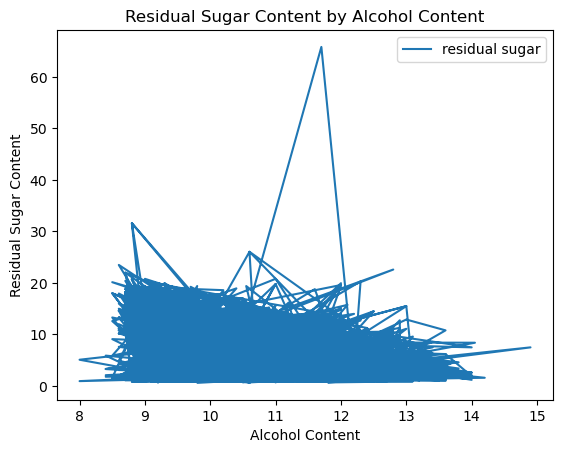

In [28]:
wineQuality.plot(kind='line', x='alcohol', y='residual sugar')
plt.xlabel('Alcohol Content')
plt.ylabel('Residual Sugar Content')
plt.title('Residual Sugar Content by Alcohol Content')
plt.show()

### Pie Chart of Wine Type Proportions

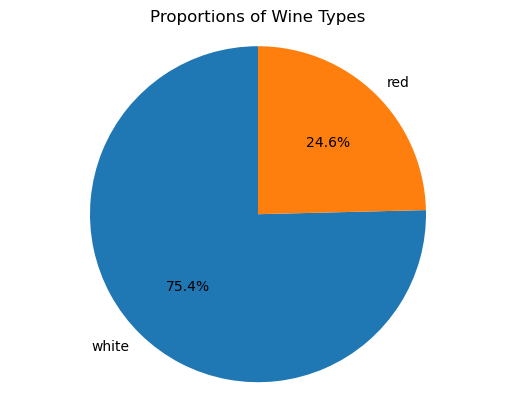

In [29]:
wine_type_counts = wineQuality['type'].value_counts()
plt.pie(wine_type_counts, labels=wine_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportions of Wine Types')
plt.show()

## Reflections 

When comparing Python and Excel, there are significant differences in their functionality and use cases. Python is a powerful programming language that offers advanced data manipulation and analysis capabilities, while Excel is spreadsheet software that offers basic data manipulation and analysis capabilities. Python has a number of libraries such as NumPy, Pandas, and Matplotlib that allow users to perform complex data analysis, data visualization, and machine learning. In contrast, Excel is easier to learn and use and is suitable for small to medium-sized datasets, while Python is better suited for large datasets and complex analysis.

The choice of whether to use Python or Excel depends on the nature and size of the data, the complexity of the analysis, and the user's preference and expertise. Python is more suitable for advanced data analysis, machine learning, and big data projects, while Excel is more suitable for small-scale analysis, budgeting, and financial modeling.

If I were to do this assignment over again, I would spend more time analyzing and interpreting the data to provide greater insights into the dataset. While the code was correct and functional, more in-depth analysis would have been helpful to better understand the relationships between the variables. Additionally, I would have included additional statistical tests to investigate the relationships between the variables further.

Some of the gaps in my programming and stats knowledge include Limited understanding of statistical concepts such as hypothesis testing, regression analysis, and data visualization and Insufficient familiarity with data cleaning and pre-processing techniques.